<a href="https://colab.research.google.com/github/Jxhyxxk/Python_jxhyxxk/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **개념정리**

In [ ]:
'''
Perceptron

인공신경망 중 간단한 모델 중 하나임.

Perceptron은 2차원 값인  x1, x2를 가지고 w1과 w2로 구성되어 이 두 개의 벡터 값이 곱해쳐서 출력 값이 된다.

ex)

  [ 0 ( w1x1 + w2x2 <= 𝜎 )
c=|
  [ 1 ( w1x1 + w2x2 > 𝜎 )

w1 = 1, w2 = -1, 𝜎 = 0 인 경우

c = 0 일 때에 x1 - x2 <= 0, x1 <= x2
c = 1 일 때에 x1 - x2 > 0, x1 > x2
'''

[ 레포트 – 위 perceptron 수식을 프로그램하고 3가지 x1,x2 값에 해당되는 c값을 print 하시오. python 데이터 입력, 조건문(if), print 문을 사용 ]

In [ ]:
from pylab import rand,plot,show,norm

class Perceptron:
 def __init__(self):
  """ perceptron initialization """
  self.w = rand(2)*2-1 # weights
  self.learningRate = 0.1

 def response(self,x):
  """ perceptron output """
  y = x[0]*self.w[0]+x[1]*self.w[1] # dot product between w and x
  if y >= 0:
   return 1
  else:
   return -1

 def updateWeights(self,x,iterError):
  """
   updates the weights status, w at time t+1 is
       w(t+1) = w(t) + learningRate*(d-r)*x
   where d is desired output and r the perceptron response
   iterError is (d-r)
  """
  self.w[0] += self.learningRate*iterError*x[0]
  self.w[1] += self.learningRate*iterError*x[1]

 def train(self,data):
  """
   trains all the vector in data.
   Every vector in data must have three elements,
   the third element (x[2]) must be the label (desired output)
  """
  learned = False
  iteration = 0
  while not learned:
   globalError = 0.0
   for x in data: # for each sample
    r = self.response(x)
    if x[2] != r: # if we have a wrong response
     iterError = x[2] - r # desired response - actual response
     self.updateWeights(x,iterError)
     globalError += abs(iterError)
   iteration += 1
   if globalError == 0.0 or iteration >= 100: # stop criteria
    print('iterations',iteration)
    learned = True # stop learning

In [ ]:
    def generateData(n):

 xb = (rand(n)*2-1)/2-0.5
 yb = (rand(n)*2-1)/2+0.5
 xr = (rand(n)*2-1)/2+0.5
 yr = (rand(n)*2-1)/2-0.5
 inputs = []
 for i in range(len(xb)):
  inputs.append([xb[i],yb[i],1])
  inputs.append([xr[i],yr[i],-1])
 return inputs

iterations 2


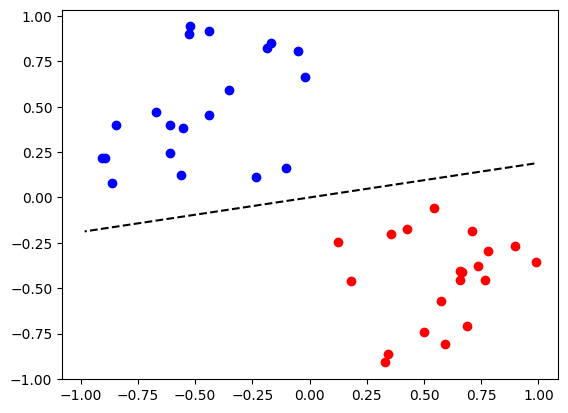

In [ ]:
trainset = generateData(30) # train set generation
perceptron = Perceptron()   # perceptron instance
perceptron.train(trainset)  # training
testset = generateData(20)  # test set generation

# Perceptron test
for x in testset:
 r = perceptron.response(x)
 if r != x[2]: # if the response is not correct
  print('error')
 if r == 1:
  plot(x[0],x[1],'ob')
 else:
  plot(x[0],x[1],'or')

# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.w)
ww = perceptron.w/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')
show()

Sigmoid

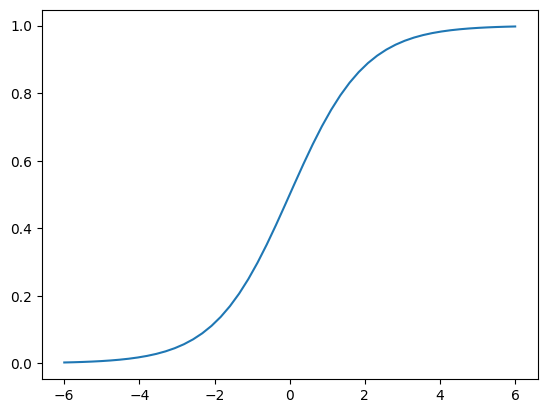

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X_1 = np.linspace(-6, 6)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Y_1 = sigmoid(X_1)

plt.plot(X_1, Y_1)
plt.show()

Relu

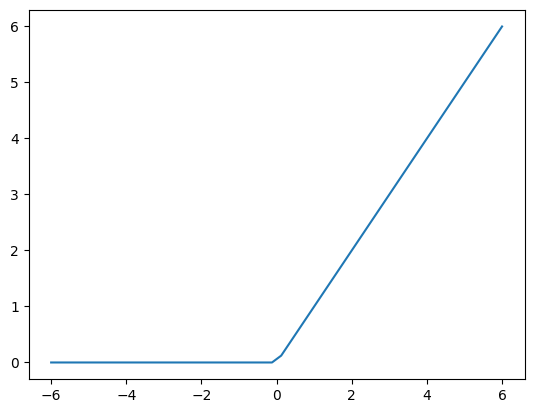

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X_1 = np.linspace(-6, 6)

def relu(x):
  return np.maximum(0,x)

Y_1 = relu(X_1)

plt.plot(X_1, Y_1)
plt.show()

행열곱

In [ ]:
'''
행열곱 연산 방법
두 개의 행열 A와 B가 있을 때 행열곱을 하기 위해선 A의 열 개수와 B의 행 개수가 같아야한다.
A의 크기가 m X n, B의 크기가 n X p라 하고 행열곱한 행열을 C라 할 때
C의 크기는 m X P가 된다.


2 X 2 행열곱

 A =  |a11  a12|       B = |b11  b12|
      |a21  a22|           |b21  b22|

이라는 행열이 있을 때 행열곱 C의 원소는
A의 i번째 행과 B의 j번째 열의 원소들을 곱하고 모두 더한다

따라서 C = |a11 * b11 + a12 * b21      a11 * b12 + a12 * b22|
           |a21 * b11 + a22 * b21      a21 * b12 + a22 * b22|   가 된다.


3 X 3 행열곱

 A =  |a11  a12  a13|       B = |b11  b12  b13|
      |a21  a22  a23|           |b21  b22  b23|
      |a31  a32  a33|           |b31  b32  b33|


 C =  |C11  C12  C13|
      |C21  C22  C23|
      |C31  C32  C33|           -> C11 = a11 * b11 + a12 * b21 + a13 * b31
                                   C12 = a11 * b12 + a12 * b22 + a13 * b32
                                   C13 = a11 * b13 + a12 * b23 + a13 * b33

                                   C21 = a21 * b11 + a22 * b21 + a23 * b31
                                   C22 = a21 * b12 + a22 * b22 + a23 * b32
                                   C23 = a21 * b13 + a22 * b23 + a23 * b33

                                   C31 = a31 * b11 + a32 * b21 + a33 * b31
                                   C32 = a31 * b12 + a32 * b22 + a33 * b32
                                   C33 = a31 * b13 + a32 * b23 + a33 * b33
'''

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

A = np.array([[1,2],[3,4]])         # A = |1  2|
A.shape                             #     |3  4|



B = np.array([[5,6],[7,8]])         #B = |5  6|
B.shape                             #    |7  8|


np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [ ]:
'''
만일 행열이
A = |1  2|  , B = |1  3  5|
                  |2  4  6|
같이 생겼다면 A를 B의 각 열에 곱하여 계산하면 된다
즉 위 A와 B의 행열곱 C는

C = |C1  C2  C3|      /      C1 = 1 * 1 + 2 * 2, C2 = 1 * 3 + 2 * 4, C3 = 1 * 5 + 2 * 6

 -> |5  11 17| 이 된다.
'''

In [ ]:
A = np.array([1,2])
A.shape
B = np.array([[1,3,5],[2,4,6]])
B.shape
np.dot(A,B)

array([ 5, 11, 17])

은닉층 계산하기

In [ ]:
'''
은닉층을 계산하기 위해서는 Sigmoid 함수를 써야한다 Sigmoid 식은 아래와 같다.
'''

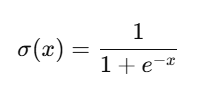

In [ ]:
'''
Sigmoid 함수는 비선형성(Non-linearity)를 추가 하기 위해 사용됨

또한, 입력값을 0과 1사이로 압축시킴
위 식에서 x가 아주 큰 값을 가지면 1로 출력
          x가 아주 작은 값을 가지면 0이 출력
          x가 0을 가지면 0.5로 출력
'''

신경망

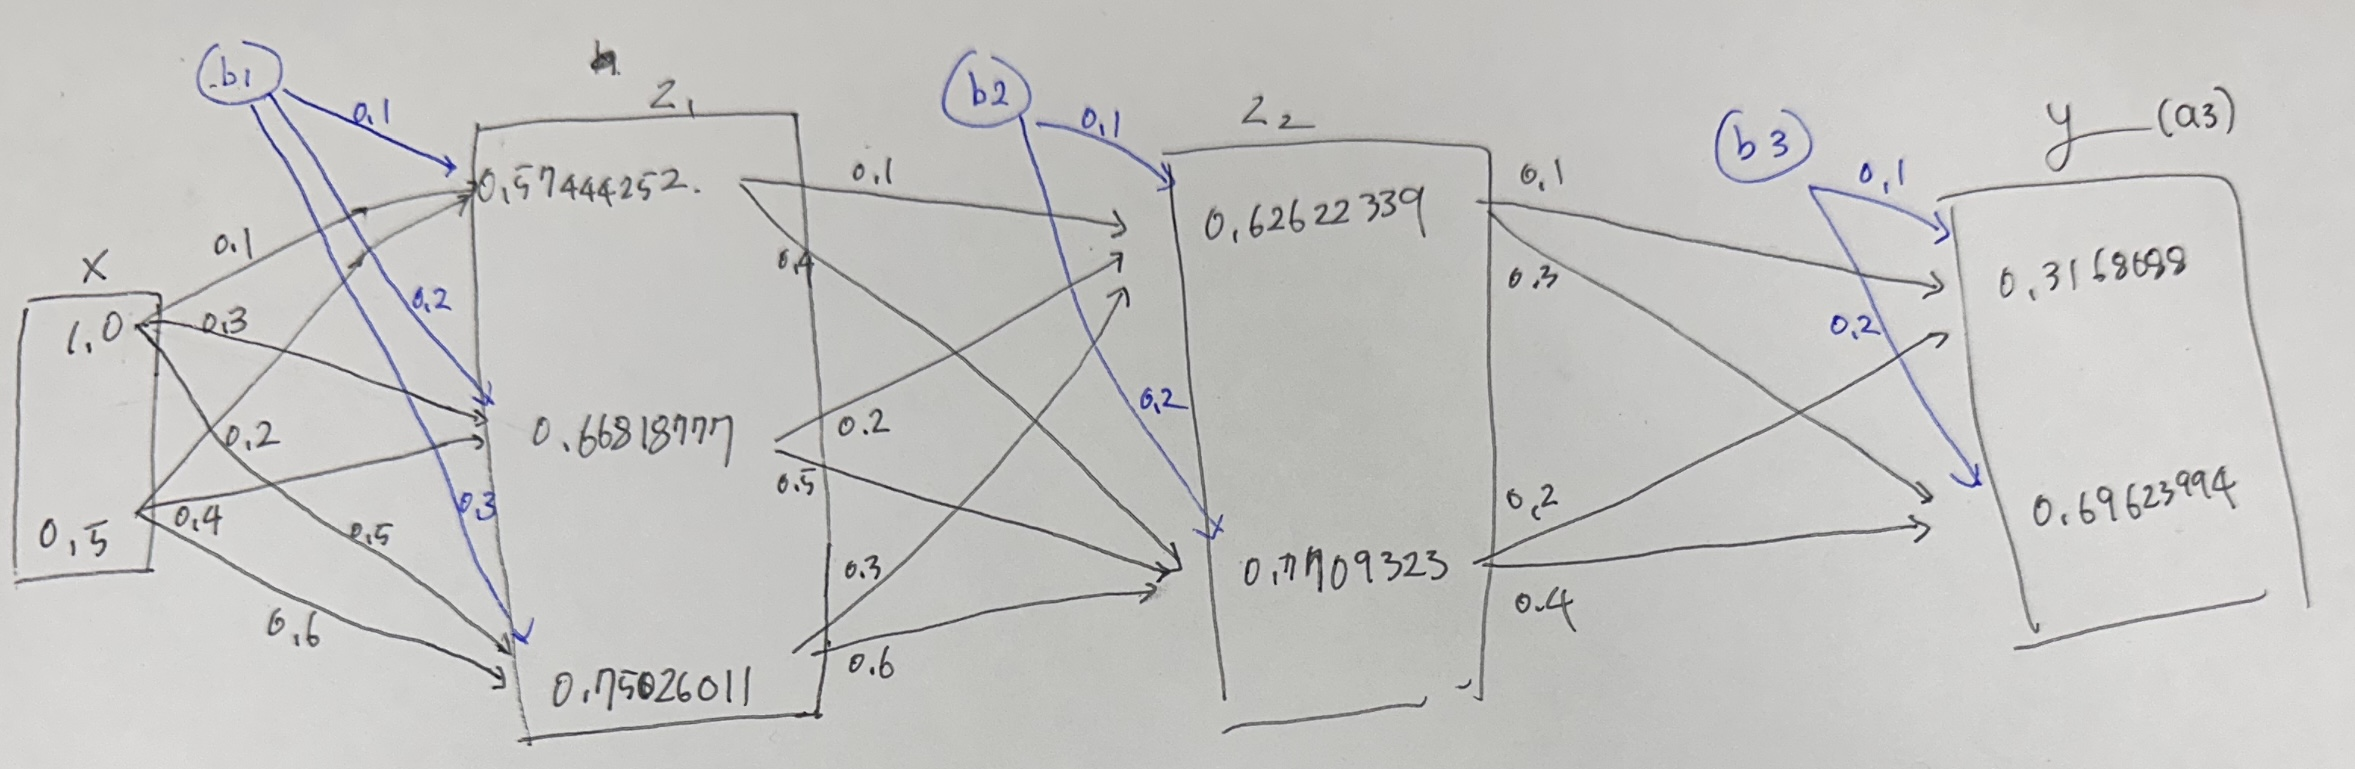

Z1(은닉층 1) 계산

In [ ]:
import numpy as np

x = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
b1 = np.array([0.1, 0.2, 0.3])
a1 = np.dot(x,W1) + b1

#Sigmoid 정의 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(np.dot(x,W1))
print(np.dot(x,W1) + b1)
sigmoid(a1)

[0.2 0.5 0.8]
[0.3 0.7 1.1]


array([0.57444252, 0.66818777, 0.75026011])

Z2(은닉층 2) 계산

In [ ]:
import numpy as np

z1 = np.array([0.57444252, 0.66818777, 0.75026011])
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
b2 = np.array([0.1, 0.2])
a2 = np.dot(z1, W2) + b2

print(np.dot(z1, W2))
print(np.dot(z1, W2) + b2)
sigmoid(a2)

[0.41615984 1.01402696]
[0.51615984 1.21402696]


array([0.62624937, 0.7710107 ])

y(출력층) 계산

In [ ]:
import numpy as np

z2 = np.array([0.62622339, 0.7709323])
W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
b3 = np.array([0.1, 0.2])
a3 = np.dot(z2,W3) + b3  # 행열곱 하면 됨

#Identitiy function 정의, 값 자체를 그대로 출력함(회귀)
def identity_function(x):
  return x

print(np.dot(z2,W3))
print(np.dot(z2,W3) + b3)
identity_function(a3)

[0.2168088  0.49623994]
[0.3168088  0.69623994]


array([0.3168088 , 0.69623994])

Keras

In [ ]:
'''
Keras Model의 정의에는 2가지가 있다.

1. Sequential Model   ->  layer를 차곡차곡 쌓은 형태

model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
위 코드로 Sequential이 구현 가능

2. Functional API     ->  layer를 무방향성 그래프 형태로 만드는것, 임의 구조 모델이 가능하다.

input_tensor = layer.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

'''

In [ ]:
from tensorflow.keras import layers, models

# 입력층: 784차원 (28x28 이미지 펼친 벡터)
input_tensor = layers.Input(shape=(784,))

# 은닉층: 32개의 유닛, ReLU 활성화
x = layers.Dense(32, activation='relu')(input_tensor)

# 출력층: 클래스 수 10개, Softmax 활성화
output_tensor = layers.Dense(10, activation='softmax')(x)

# 모델 생성
model = models.Model(inputs=input_tensor, outputs=output_tensor)

# 모델 요약 확인
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

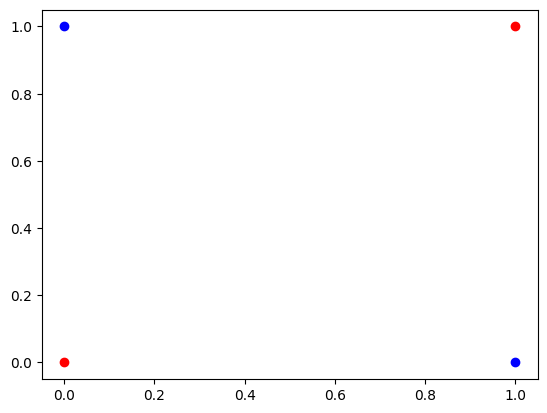

In [ ]:
'''
학습 데이터 만들고 시각화 하기
'''

# sample program
from pylab import rand,plot,show,norm
import numpy as np

# train data(XOR)
train_data = np.array([[0,0],[0,1],[1,0],[1,1]])    #입력
train_label = np.array([[0],[1],[1],[0]])           #출력

# train data 보기
for n in range (4):
  if train_label[n] == 1:
    plot(train_data[n][0],train_data[n][1],'ob')  # b:blue
  else:
    plot(train_data[n][0],train_data[n][1],'or')  # r:red
show()


In [ ]:
'''
Keras 모델(Sequential) 만들기
'''

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()   #모델의 뼈대 만들기

In [ ]:
'''
모델 구조 정의하기
model.add()     -> Keras Sequential 모델에 층을 차례대로 추가하는 함수
Dense           -> 모든 뉴런이 다음 층의 모든 뉴런과 연결시킴
Dense(2)        -> 뉴런 2개짜리 은닉층 추가
input_dim=      -> 입력 데이터의 차원구조 설정
activation=' '  -> 활성화 함수 설정
'''
#모델이 Multi layer(2개 이상)인 경우
model.add(Dense(2, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

'''
모델이 Single layer인 경우
model.add(Dense(1, input_dim=2, activation='sigmoid'))
'''

model.summary()   #모델 구조를 아래 표처럼 나타내는 함수

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
위 표에서 Param은 파라미터를 나타내고 이 파라미터는
가중치(Weight) + 편향(Bias)를 뜻하고 Shape의 갯수를 곱하면 해당 Layer의 파라미터 갯수가 나온다.
'''

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_data, train_label, epochs=1000, batch_size=10, verbose=1)

'''
model.compile()             -> 모델을 학슴할 수 있도록 설정하는 함수
                               Optimizer, Loss function, metrics를 설정

loss=' '                    -> 손실 함수(Loss function) 설정
optimizer='adam'            -> 오차를 줄이기 위해 가중치를 어떻게 업데이트할지 결정 옵티마이저
metrics=['accuracy']        -> 훈련과 테스트 과정을 모니터링할 지표 (accuracy를 모니터링)

model.fit()                 -> 설정한 모델을 학습 시키는 함수
model.fit(입력 데이터, 정답 데이터, epochs=학습 반복 횟수, batch_size=한 번 학습에 사용할 데이터 수, verbose=학습 상태 출력 형태)
'''

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7563
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7558
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7553
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7548
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.7544
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.7539
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.7534
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5000 - loss: 0.7530
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.7525
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.7520
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.7516
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 

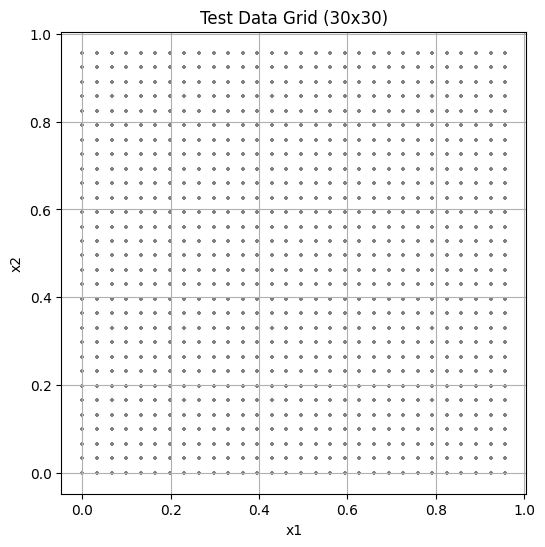

In [ ]:
test_data = np.ndarray((30*30, 2), dtype=np.float32)
n = 0
for x in range(30):
    for y in range(30):
        test_data[n][0] = 0.033 * x
        test_data[n][1] = 0.033 * y
        n = n + 1                       # test_data에 한 줄씩 차례로 넣기 위한 변수

'''
0부터 1 사이 범위에서 x, y 좌표를 조합하여 30X30개의 테스트 데이터를 만들고 결과 시각화 준비 단계

for문을 거치면서
(0.000, 0.000)
(0.000, 0.033)
(0.000, 0.066)
...
(0.033, 0.000)
(0.033, 0.033)
...
(0.957, 0.957)
이와 같은 좌표들이 생성되고 마지막 좌표 0.957 -> 거의 1에 근접한 범위 까지 만들어짐

아래 그래프는 예측을 위해 생성되는 test_data의 좌표(30 X 30 = 900)를 시각화 한것
'''

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


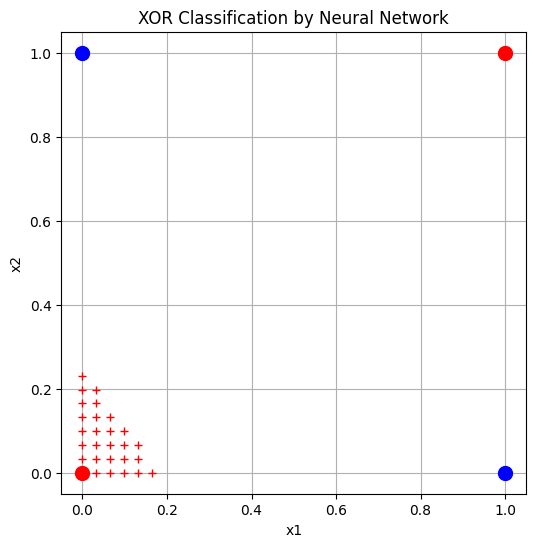

In [ ]:
#신경망 모델이 예측한 결과에 따라 test_data의 색을 정해서 시각화
res = model.predict(test_data)

for n in range (30*30):
  if res[n] < 0.4:
    plot(test_data[n][0],test_data[n][1],'+r')
  elif res[n] > 0.6:
    plot(test_data[n][0],test_data[n][1],'+b')
show()



'''
아래 그래프는 학습된 DNN에 test data를 넣고 0과 1을 res를 통해서 예측 결과를 시각화 한 것
위의 그래프처럼 900개의 좌표가 있었지만 점이 4개만 나오는건 모델이 작기도 하고
res의 값을 위 코드에서 필터링해서 아래 그래프처럼 나옴
'''

In [ ]:
'''
1) single layer 인 경우 : perceptron 모델에서 결과보기, XOR 가 해결되는가?

  XOR은 비선형 문제로 (0, 0)  ->  0
                      (0, 1)  ->  1
                      (1, 0)  ->  1
                      (1, 1)  ->  0
                      위 4개의 점은 하나의 선으로 나눌 수 없기 때문에 Perceptron 실패  =  단일층 Perceptron으로는 XOR해결 X

2) multi layer 인 경우 : XOR 가 해결되는가?

  layer가 많은 경우 입력층 -> 은닉층(비선형 활성화) -> 출력층 순으로 예측이 진행되기 때문에 은닉층이 있어 비선형 관계 학습이 가능하다
                                                       은닉층에서 Relu, Sigmoid등의 비선형 활성화 함수를 사용할 수 있기 때문이다.

'''

Softmax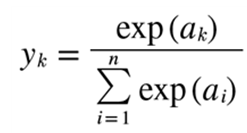

In [ ]:
'''
Softmax는 다중 클래스 분류에서 출력층 활성화 함수로
Softmax의 출력층 출력값은 0 ~ 1 범위에서 나온다
출력층을 전부 다 합하면 1
'''

Softmax 결과

In [ ]:
import numpy as np

#Softmax 정의
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

a = np.array([1.2, 1.3, 1.5, 3.0, 0.7, 4.5, 5.7, -1.3, -0.5])
y = softmax(a)
np.set_printoptions(suppress=True)

print("Softmax값: ",y)
print("Softmax값의 합: ",np.sum(y))

Softmax값:  [0.00784278 0.00866762 0.01058665 0.04744608 0.00475689 0.21263856
 0.7059849  0.00064377 0.00143275]
Softmax값의 합:  1.0


One-hot Encoding

In [ ]:
'''
 One-hot Encoding이란 범주형 데이터를 숫자로 표현하는 방법
- 각 범주를 이진 벡터(Binary Vector)로 바꿈
ex) 1, 2, 3 이라는 값이 있을 때 이를 학습 시키기 위해서는 모델에게 이진벡터 값으로 제공해야함
    따라서 1, 2, 3 -> [1, 0, 0],[0, 1, 0],[0, 0, 1] 로 제공하는 방식.

만일 데이터의 값이
[0.9227, 0.9357, 0.9827],
[0.9652, 0.9548, 0.9910],
[0.9763, 0.9478, 0.9126]
으로 제공 되었다면 이 데이터를 One-hot Encoding 하게되면

[0, 0, 1],
[0, 0, 1],
[1, 0, 0]
식으로 출력되게 됨.
'''

In [ ]:
import numpy as np

# 1. 입력 배열
arr = np.array([
    [0.9227, 0.9357, 0.9827],
    [0.9652, 0.9548, 0.9910],
    [0.9763, 0.9478, 0.9126]
])

# 2. One-hot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(arr).toarray()
print("One-hot Encoding:\n", one_hot)

# 3. ReLU
def relu(x):
    return np.maximum(0, x)
relu_result = relu(arr)
print("ReLU 결과:\n", relu_result)

# 4. Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
sigmoid_result = sigmoid(arr)
print("Sigmoid 결과:\n", sigmoid_result)

One-hot Encoding:
 [[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]
ReLU 결과:
 [[0.9227 0.9357 0.9827]
 [0.9652 0.9548 0.991 ]
 [0.9763 0.9478 0.9126]]
Sigmoid 결과:
 [[0.71559193 0.71823026 0.72764363]
 [0.72416172 0.72207947 0.7292854 ]
 [0.72637344 0.72067253 0.71353191]]


In [ ]:
import numpy as np
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # overflow 방지용
    return e_x / np.sum(e_x, axis=1, keepdims=True)

softmax_out = softmax(arr)
print("Softmax 결과:\n", softmax_out)


softmax_sum = np.sum(softmax_out)
print("Softmax 전체의 합: ", softmax_sum) #각 행마다의 합이 1이기 때문에 3행인 데이터는 3이맞음

Softmax 결과:
 [[0.32521156 0.32946691 0.34532152]
 [0.33158812 0.32815747 0.34025441]
 [0.34362033 0.33396538 0.32241429]]
Softmax 합:  3.0


Cross Entropy Loss

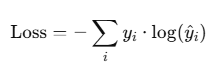

In [ ]:
'''
Crpss Entropy 는 예측 확률과 실제 정답이 얼마나 다른지를 수치화 하는 손실 함수로 식의 위의 그림과 같다.

In [ ]:
import numpy as np
from keras.utils import to_categorical

# 1. 원본 데이터 (logits라기보단 확률처럼 생겼지만 그대로 사용)
arr = np.array([
    [0.9227, 0.9357, 0.9827],
    [0.9652, 0.9548, 0.9910],
    [0.9763, 0.9478, 0.9126]
])

# 2. Softmax 함수 정의
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # 안정성 고려
    return e_x / np.sum(e_x, axis=1, keepdims=True)

softmax_out = softmax(arr)
print("Softmax 결과:\n", softmax_out)

# 3. 정답 레이블 정의 (예: 3개의 샘플의 실제 정답이 클래스 2, 2, 0 이라고 가정)
y_true_labels = np.array([2, 2, 0])

# One-hot Encoding
y_true_onehot = to_categorical(y_true_labels, num_classes=3)
print("One-hot 정답:\n", y_true_onehot)

# 4. Cross Entropy 계산
eps = 1e-9  # log(0) 방지
log_preds = np.log(softmax_out + eps)
loss_per_sample = -np.sum(y_true_onehot * log_preds, axis=1)
mean_loss = np.mean(loss_per_sample)

print("각 샘플별 Cross Entropy Loss:", loss_per_sample)
print("평균 Loss:", mean_loss)


Softmax 결과:
 [[0.32521156 0.32946691 0.34532152]
 [0.33158812 0.32815747 0.34025441]
 [0.34362033 0.33396538 0.32241429]]
One-hot 정답:
 [[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]
각 샘플별 Cross Entropy Loss: [1.06327934 1.07806168 1.06821793]
평균 Loss: 1.0698529858042665


MNIST

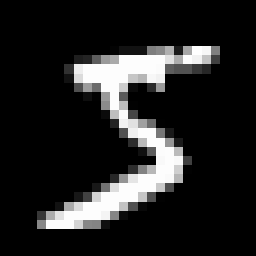

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.4990 - loss: 1.5080 - val_accuracy: 0.9428 - val_loss: 0.2046
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8858 - loss: 0.3678 - val_accuracy: 0.9613 - val_loss: 0.1270
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9213 - loss: 0.2550 - val_accuracy: 0.9708 - val_loss: 0.1001
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9334 - loss: 0.2182 - val_accuracy: 0.9753 - val_loss: 0.0865
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9431 - loss: 0.1839 - val_accuracy: 0.9780 - val_loss: 0.0736
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9507 - loss: 0.1601 - val_accuracy: 0.9798 - val_loss: 0.0692
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9552 - loss: 0.1478 - val_accuracy: 0.9825 - val_loss: 0.0623
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9587 - loss: 0.1364 - val_accuracy: 0

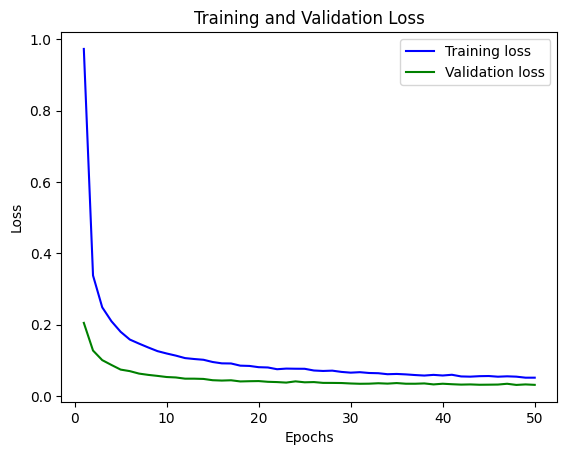

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.datasets import mnist
from google.colab.patches import cv2_imshow

# 데이터 로드
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

# 이미지 전처리
img_size = 28
ch = 1
train_imgs = train_imgs.reshape(train_imgs.shape[0], img_size, img_size, ch)
test_imgs = test_imgs.reshape(test_imgs.shape[0], img_size, img_size, ch)

# 이미지 확인
v_img = cv2.resize(train_imgs[0], (256, 256), interpolation=cv2.INTER_NEAREST)
cv2_imshow(v_img)

# 정규화
train_imgs = train_imgs.astype('float32') / 255
test_imgs = test_imgs.astype('float32') / 255

# One-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# 모델 설계
model = Sequential()
model.add(Conv2D(6, (3, 3), activation='relu', input_shape=(img_size, img_size, ch)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습
history = model.fit(train_imgs, train_labels, batch_size=512, epochs=50, validation_split=0.1)

# 평가
score = model.evaluate(test_imgs, test_labels, verbose=0)
print("Test accuracy:", score[1])

# 손실 그래프
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b-', label='Training loss')
plt.plot(epochs, val_loss_values, 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# **족보풀이**

**24년 중간**

1. 다음 프로그램 실행 결과를 기술하시오.

In [ ]:
import numpy as np
a = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
idx = np.array([True, False, True, False, True,
                False, True, False, True, False])

In [ ]:
print(a[idx])  #배열 a를 idx에서 True 값만 인덱싱하여 출력
               #즉, True는 [0, 2, 4, 6, 8] 값에 위치하기 때문에 해당 값 출력

[0 2 4 6 8]


In [ ]:
print(a % 3)  #배열 a의 각 요소를 3으로 나누었을 때의 나머지

[0 1 2 0 1 2 0 1 2 0]


In [ ]:
print(a % 3 == 1)  #배열 a의 각 요소를 3으로 나누었을 때 나머지가 1인 값들을 True, 아닌 값들을 False로 표시

[False  True False False  True False False  True False False]


In [ ]:
print(a[a % 2 == 0])  #배열 a의 각 요소를 2로 나누었을 때 나머지가 0인 값(즉, 짝수)들만 print

[0 2 4 6 8]


2. 다음 신경망에서 x1=2, x2=1일 때 출력값
   y1, y2, y3를 기술하시오

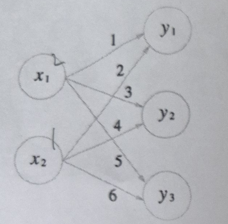

In [ ]:
'''
y1의 출력값 구하기

2 * 1 + 1* 2 = 4

y2의 출력값 구하기

2 * 3 + 1* 4 = 10

y3의 출력값 구하기

2 * 5 + 1 * 6 = 16
'''

3. 다음 용어를 설명하시오.

1)softmax  2)one-hot encoding  3) categorical_crossentropy  4)mse

5)SGD  6) momentum  7) adaptive gradient  8) drop-out

In [ ]:
'''
1) Softmax
벡터를 확률 분포로 변환하는 함수
출력값은 0 ~ 1 사이이며, 총합은 1이 나오게 된다.
다중 클래스 분류의 출력층에서 사용된다.

2) one-hot encoding
정수 클래스를 0과 1 값으로 변환하는 프로세스

3) categorical_crossentropy
예측 확률 분포와 실제 One-hot encoding 간의 차이를 측정하는 손실 함수

4) MSE
회귀 문제에서 사용되는 손실 함수
예측값과 실제값의 차이를 제곱하여 평균을 낸 것

5) SGD
목적 함수를 최적화 하기 위해서 전체 데이터가 아닌 랜덤 샘플(batch)을 기반으로 매번 가중치를 갱신하는 경사하강법

6) Momentum
공이 바닥을 구르는듯한 움직임을 보이며, SGD의 단점을 보완하는 기법

7) adaptive gradient
각 매개변수에 대해 학습률을 자동으로 조정

8) drop-out
과적합(overfitting)을 막기 위해 학습(train) 중 일부 뉴런을 무작위로 삭제하는 기법
'''

4-1. SGD중에 S 부분을 구현하기 위한 프로그램을 기술하시오.

4-2. batch normalization수식을 기술하고 이 수식이 어떻게 normalize 하는지를 설명하시오.

Batch normalizarion 수식

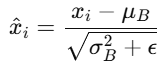

𝑥𝑖 : 배치 내 입력 값,
μ B: 배치의 평균,
σ B2: 배치의 분산,
𝜖: 작은 상수 (0으로 나누기 방지),
𝑥^𝑖 : 정규화된 결과

In [ ]:
'''
분자에 있는 (입력 값) - (평균)을 통해서 데이터를 중심화 하고 표준편차로 나누며 스케일이 조정된다.
이 과정을 거치며 정규화된 데이터는 평균이 0, 분산이 1이게 되고 이렇게 되면 표준 정규 분포를 따르며 정규화 되게 된다.
'''

5-1. 다음 프로그램 실행 결과를 기술하시오

In [ ]:
y = np.array([0, 1, 5, 2, 3])
print(y)

[0 1 5 2 3]


In [ ]:
y = to_categorical(y, 6)  #to_categorical(y, 열 갯수) -> 배열 y를 one-hot encoding 하는 함수, 열 갯수가 클래스의 수가 됨
print(y)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


5-2. 출력단이 model.add(Dense(1, activation='sigmoid'))인 경우
위와 같이 y가 바뀐 경우 출력단은 어떻게 변경되어야 하는가?

In [ ]:
'''
출력단이 1개의 클래스에서 6개의 클래스로 변경 되면서 sigmoid를 사용해서 다중 클래스 분류는 적합하지 않으니
softmax를 사용하여 다중 클래스 분류에 적합하도록 바꿔야 한다
즉, model.add(Dense(6, activation='softmax'))로 수정하면 된다.ㄷ
'''

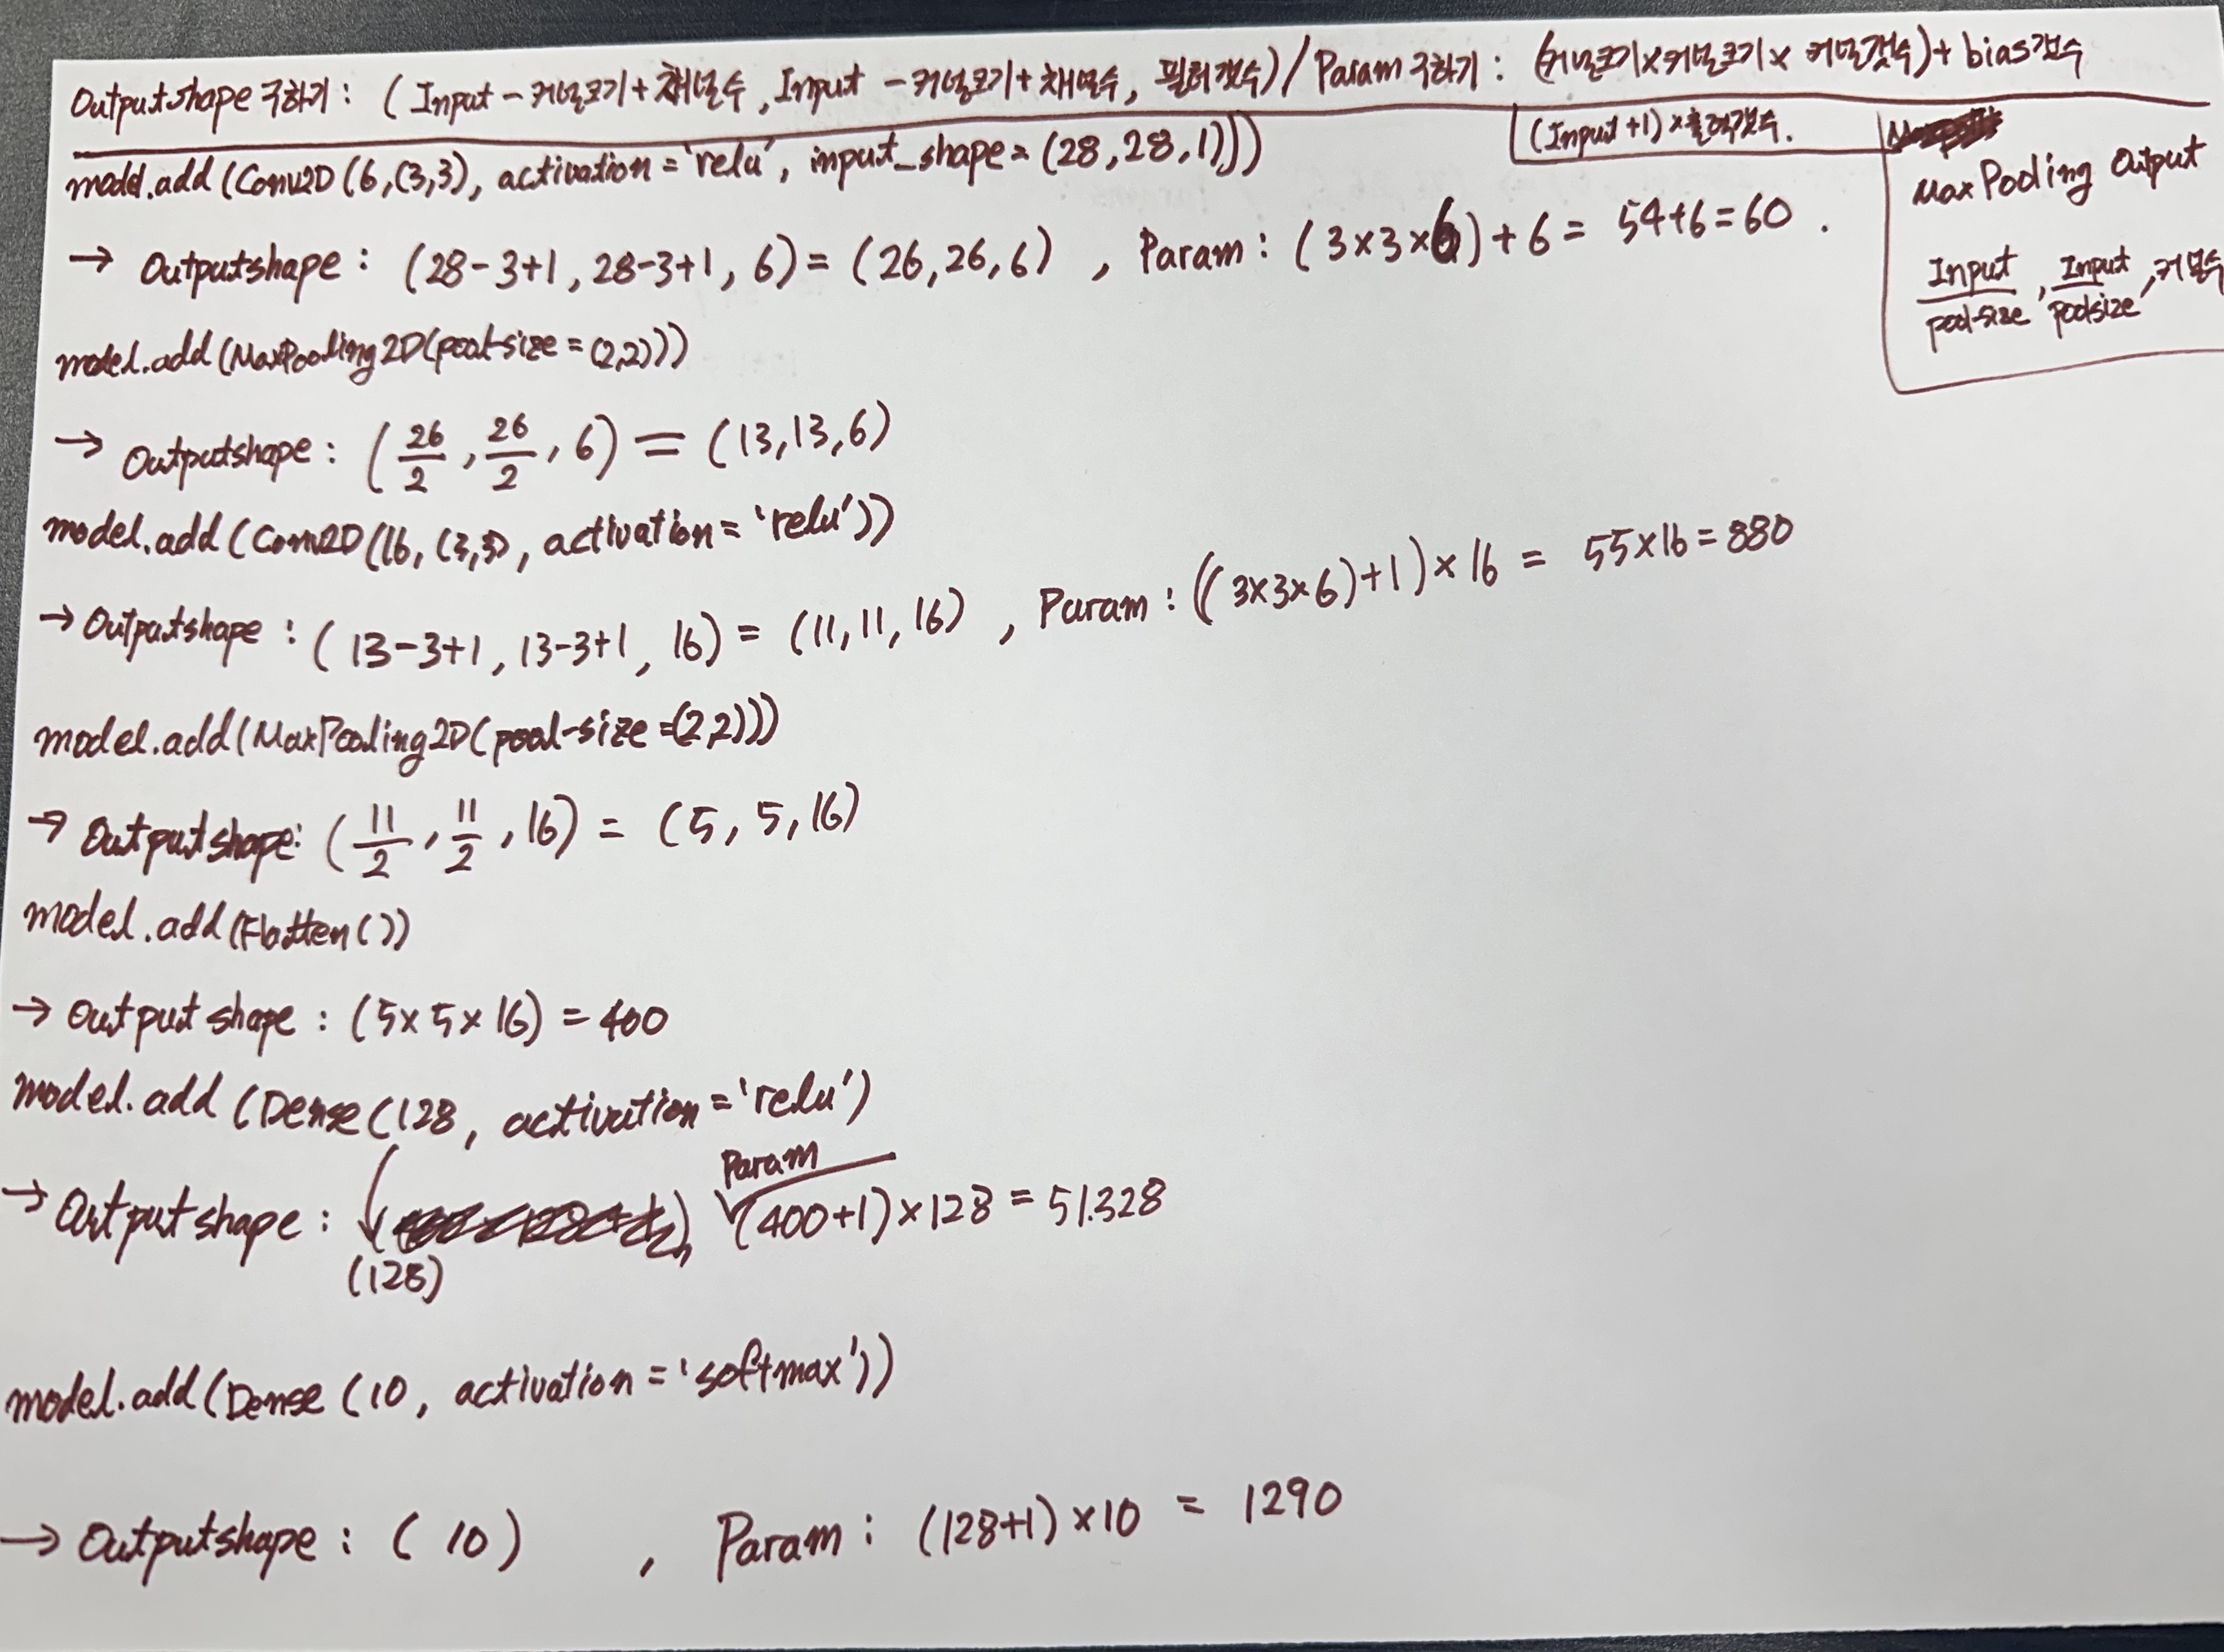

6. model.add(Conv2D(4, (3,3), activation='relu', input_shape=(32,32,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

위 convolution layer에서

6-1. param의 개수는?

In [ ]:
'''
위 코드 model.add(Conv2D(4, (3,3), activation='relu', input_shape=(32,32,3)))
        model.add(MaxPooling2D(pool_size=(2,2)))  에서 각 성분이 뜻하는건

Conv2D(...)	             ->  2D Convolution 합성곱 레이어 생성
Conv2D(4, (3,3))         ->  2D Convolution 합성곱 레이어의 필터 개수를 4개, 커널의 크기를 3X3 영역으로 설정
activation='relu'        ->  활성화 함수로 relu(음수는 0, 양수는 그대로 출력) 사용
input_shape=(32, 32, 3)  ->  입력 데이터의 형태를 32X32 크기의 채널 수 3(RGB)으로 설정


Conc2D의 param 수 공식

param=(커널높이 X 커널너비 X 입력채널 수 + 1) X 필터 수
-> (3 X 3 X 3 + 1) X 4 = (27 + 1) X 4 = 112

답: 112개
'''

6-2. 3X3 필터의 개수는?

In [ ]:
'''
Conv2D(4, (3,3)) -> 이를 통해서 3X3 필터 4개를 만들겠다고 선언

답: 4개
'''

6-3. output shape는?

In [ ]:
'''
1. Input: (32, 32, 3)
2. Conv2D: (30, 30, 4)
3. MaxPooling2D: (15, 15, 4)

답: (15, 15, 4)
'''

**23년 중간**

1. 다음 행렬에서 배열을 슬라이싱 하는 프로그램을 작성

In [ ]:
import numpy as np

m = np.array([[0,   1,   2,   3,   4],
              [5,   6,   7,   8,   9],
              [10, 11,  12,  13,  14]])

In [ ]:
print(m[:,1::2 ])

[[ 1  3]
 [11 13]]


[2, 7, 12]을 슬라이싱 하는 프로그램

In [ ]:
print(m[:,2:3])

[[ 2]
 [ 7]
 [12]]


다음 행렬에서 배열[[6,7,8],[11,12,13]]을 슬라이싱 하는 프로그램을 작성

In [ ]:
print(m[1:2,1:4],m[2:,1:4])

[[6 7 8]] [[11 12 13]]


2. 다음 신경망에서 x = [2, 1], activation=RELU 일 때 출력 y를 계산하시오.

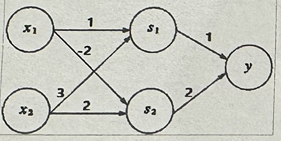

In [ ]:
'''
주어진 입력값을 통해서 은닉층 계산 후, 출력층에서 ReLU 적용하면 됨
'''

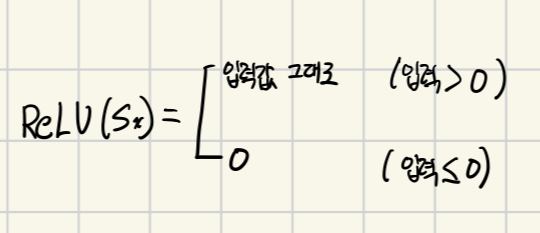

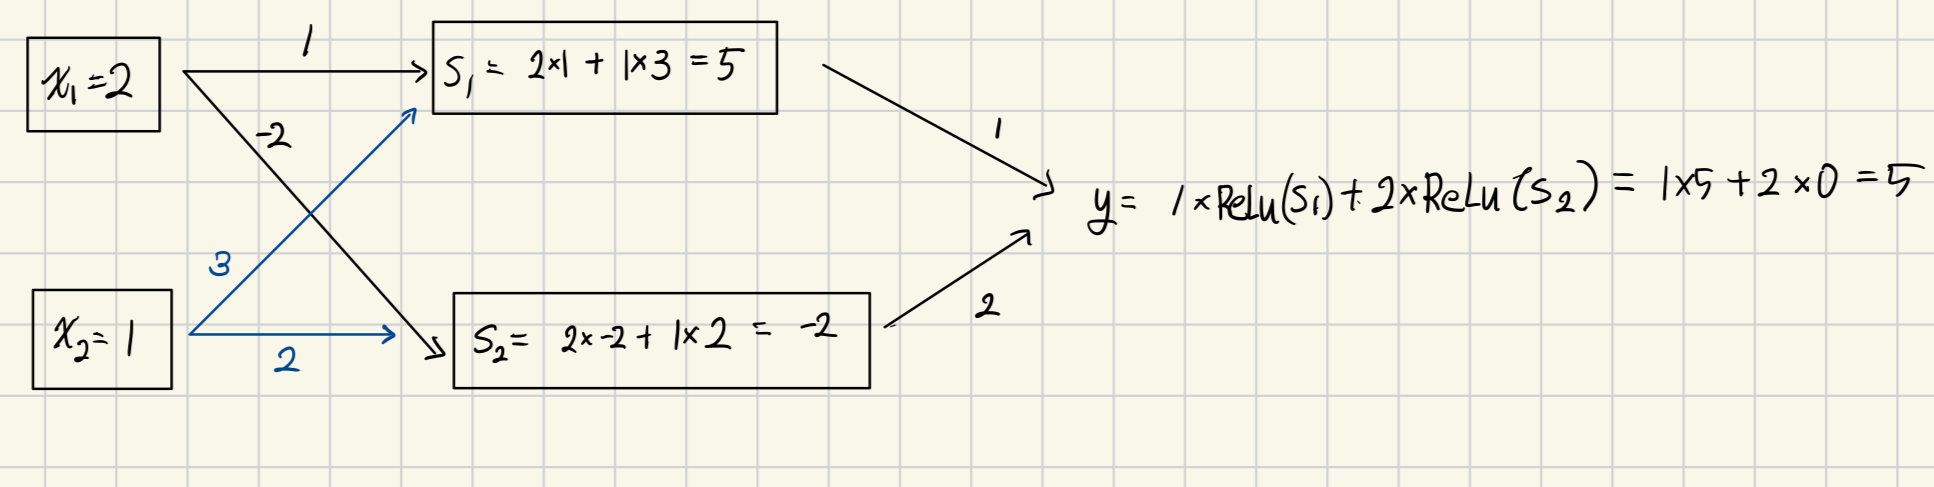

3. 아래 코드를 참고하여 신경망 그림에 해당되는 keras sequential model을 기술하시오.

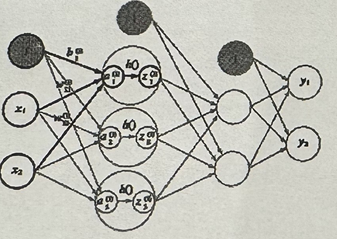

In [ ]:
#참고 코드
#model = Sequential()
#model.add(Dense(2, input_dim=2, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))

In [ ]:
'''
신경망 그림을 보면 x1,x2로 입력층은 2개, 그 다음 은닉층_1에 뉴런이 3개, 그다음 은닉층_2에 뉴런이 2개, 출력층의 뉴런은 2개, 그리고 각 뉴런에 Bias가 되어있다
그리고 위 코드를 이용해 해당 그림을 코딩하면

model = Sequential()
model.add(Dense(3, input_dim=2, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))

가 되게 된다.

4. 다음 그림을 참고하여 cost 가 최소가 되는 w를 찾는 과정을 기술하시오.

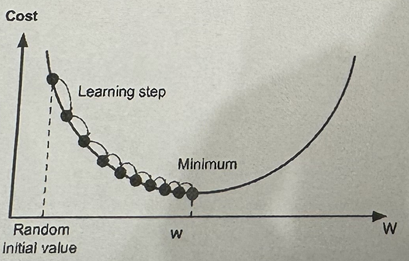

In [ ]:
'''
위 그림은 경사 하강법으로
임의의 가중치를 cost를 이용하여서 최소 가중치 w를 찾는 방법이다.

경사 하강법은 임의의 가중치를 cost에 대하여 미분하여 얻은 기울기를 이용하여서 최소 가중치 w를 찾게 되는데
기울기가 해당 지점에서 얼마나 증가/감소 하는지를 나타낸다
'''

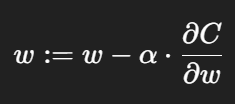

In [ ]:
'''
이 식을 이용하여서 계산하게 되고 여기서 Alpha 값은 학습률을 의미하며 한번에 얼마나 이동할지를 결정하게 된다.
이 과정을 반복하면서 기울기가 0이 되는 지점을 찾고 그 지점이 최소 가중치(w)이다.
'''

5. 다음 데이터에 대해 mse를 구하시오.

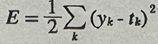

In [ ]:
데이터

y = [0.2, 0.3, 0.7, 0.1]
t = [0, 0, 1, 0]

In [ ]:
'''
주어진 식은 제곱 오차 함수식이고
mse 계산은 평균값을 구하는 것이기 때문에 데이터의 갯수인 4로 나눠주어 계산하면 mse가 나온다.

1/4{ (0.2-0)^2 + (0.3-0)^2 + (0.7-1)^2 + (0.1-0)^2 } = 1/4( 0.04 + 0.09 + 0.09 + 0.01 ) = 1/4( 0.23 ) = 0.0575이다.

답: 0.0575
'''

6. 다음 프로그램을 설명하시오.

In [ ]:
 batch size = 10
 (train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
 batch_mask = np.random.choice(train_imgs.chape[0], batch_size)
 x_batch = train_imgs[batch_mask]

In [ ]:
 batch size = 10
 '''
 한 번 학습에 사용할 데이터 개수를 10개로 설정, 미니배치 size = 10
 '''

In [ ]:
 (train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
'''
MNIST 데이터셋을 불러오는 코드
train_imgs, train_labels : 학습 데이터
test_imgs, test_labels : 테스트 데이터
'''

In [ ]:
 batch_mask = np.random.choice(train_imgs.chape[0], batch_size)
 '''
train_imgs.shape[0]                                   -> 전체 학습 데이터의 개수(60,000개)

np.random.choice( , )                                 -> 핟습데이터에서 batch크기만큼의 무작위 인덱스를 추출
                                                         프로그램이 읽는 코드는 np.random.choice(60000, 10) 이 됨

batch_mask=                                           -> 추출한 인덱스를 샘플 mask로 사용

 x_batch = train_imgs[batch_mask]                     -> batch_mask에서 뽑은 인덱스 중에서 10개 추출
                                                         x_batch는 (10, 28, 28) 크기의 손글씨 이미지 데이터 10장

전체 학습 데이터 (60,000개) 중에서 무작위 10개를 뽑아 x_batch라는 이름의 미니배치로 만드는 코드
 '''